In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
import os
from scipy.stats import rankdata
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
#Import kbmod code
from createImage import createImage
from createImage import analyzeImage

###Create images with random Gaussian sources as stars and one faint moving object source

In [4]:
t0Pos = [200., 200.]
velocity = [4., 8.]
faket0Pos = [60., 80.]
fakevelocity = [-10., -10.]
imageTimes = np.arange(1,6.1,1)
imageSize = [512., 512.]
gaussianSigma = [2., 2.]
backgroundLevel = 100.
sourceFlux = 400.
addStars = True
fileName = 'test'
if os.path.exists(str(fileName+'.fits')):
    os.remove(str(fileName+'.fits'))
if os.path.exists(str(fileName+'_var.fits')):
    os.remove(str(fileName+'_var.fits'))
createImage().createSingleSet(fileName, t0Pos, velocity, imageTimes, imageSize,
                              backgroundLevel, sourceFlux, gaussianSigma, addStars = addStars, sourceNoise=True)

In [5]:
hdulist = fits.open('test.fits')
hdulistVar = fits.open('test_var.fits')
if addStars == True:
    starList = np.genfromtxt('test_stars.dat')
    starFlux = np.genfromtxt('test_starsFlux.dat')

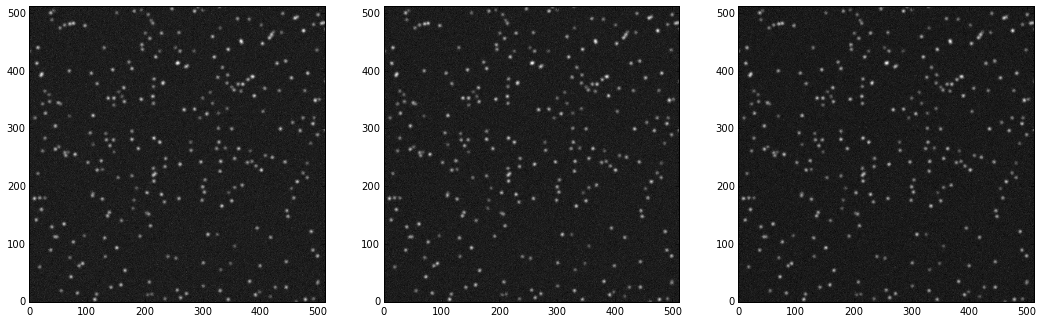

In [6]:
fig = plt.figure(figsize=(18, 6))
for imNum in range(0, 3):
    fig.add_subplot(1, 3, imNum+1)
    plt.imshow(hdulist[0].data[imNum]-(backgroundLevel*np.ones((imageSize))), cmap=mpl.cm.Greys_r, origin='lower')#, norm=mpl.colors.LogNorm())

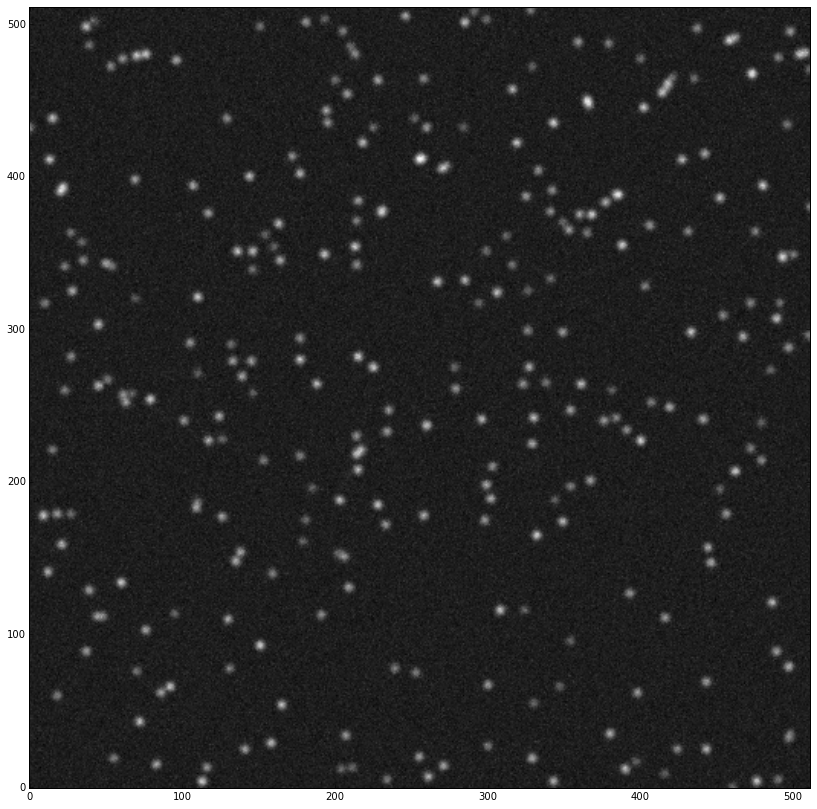

In [7]:
fig = plt.figure(figsize=(14, 14))
plt.imshow(hdulist[0].data[0]-(backgroundLevel*np.ones((imageSize))), origin='lower', cmap=mpl.cm.Greys_r)

###Create Psi/Phi Likelihood Images from Demo Images

In [8]:
psiImages = analyzeImage().calcPsi(hdulist[0].data, 2., verbose=True, starLocs = starList,
                                                         background = backgroundLevel)

On Image 1 of 6
On Image 2 of 6
On Image 3 of 6
On Image 4 of 6
On Image 5 of 6
On Image 6 of 6


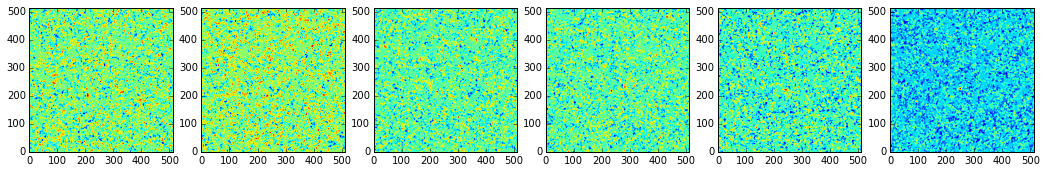

In [9]:
fig = plt.figure(figsize=(18,6))
for objNum in range(6):
    fig.add_subplot(1,6,objNum+1)
    plt.imshow(psiImages[objNum], origin='lower')

In [10]:
phiImage = analyzeImage().calcPhi(np.shape(hdulist[0].data[0]), 2., verbose=True, starLocs=starList,
                                                         background = backgroundLevel)

On Image 1 of 1


In [11]:
phiImages = np.zeros(np.shape(psiImages))
for num in range(len(psiImages)):
    phiImages[num] = phiImage[0]

###Show possible image-to-image velocity vectors.

In [12]:
vRow, vCol, numSteps = analyzeImage().definePossibleTrajectories(1., 3, 1)
print vRow, vCol

[ 0.75        0.58941545  0.17642818 -0.31211013 -0.66699493 -0.7362555
 -0.49023272 -0.03427979  0.43635262  0.72012771  1.5         1.17883089
  0.35285636 -0.62422025 -1.33398985 -1.47251101 -0.98046543 -0.06855958
  0.87270523  1.44025543  2.25        1.76824634  0.52928454 -0.93633038
 -2.00098478 -2.20876651 -1.47069815 -0.10283937  1.30905785  2.16038314
  3.          2.35766178  0.70571272 -1.24844051 -2.6679797  -2.94502201
 -1.96093086 -0.13711915  1.74541047  2.88051086  0.        ] [ 0.          0.46377735  0.72895343  0.68197307  0.34295447 -0.14292597
 -0.56760187 -0.74921619 -0.60999704 -0.20956162  0.          0.9275547
  1.45790685  1.36394614  0.68590894 -0.28585194 -1.13520374 -1.49843238
 -1.21999409 -0.41912325  0.          1.39133206  2.18686028  2.04591921
  1.02886341 -0.42877792 -1.70280561 -2.24764856 -1.82999113 -0.62868487
  0.          1.85510941  2.9158137   2.72789228  1.37181788 -0.57170389
 -2.27040749 -2.99686475 -2.43998817 -0.83824649  0.        ]


/Users/Bryce/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


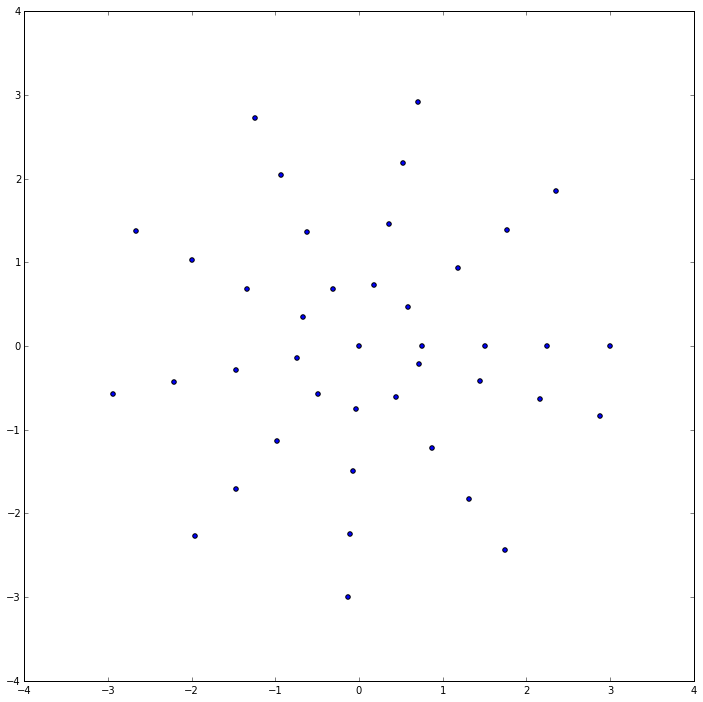

In [13]:
fig = plt.figure(figsize=(12,12))
plt.scatter(vRow, vCol)

###Go through likelihood images using given maximum velocity and search for highest probability matches.

In [28]:
#Options in order:
#
#Set of psi images
#Set of phi images
#Width of psf in pixels
#Maximum velocity between images in pixels
#Maximum timestep
#Time at which each images was taken
#Specified range of pixels of image in x direction to search
# "" in y direction

%time topt0, topVel, topScores, topAlpha = analyzeImage().findLikelyTrajectories(np.array(psiImages), \
                                                                                 np.array(phiImages), \
                                                                                 2., \
                                                                                 12, \
                                                                                 1, \
                                                                                 imageTimes-1., \
                                                                                 xRange = [180, 220], \
                                                                                 yRange = [180, 220])

180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219

Top 10 results
Starting Positions: 
[[ 198.  207.]
 [ 203.  213.]
 [ 200.  206.]
 [ 203.  211.]
 [ 212.  210.]
 [ 213.  208.]
 [ 198.  205.]
 [ 200.  208.]
 [ 196.  206.]
 [ 203.  215.]]
Velocity Vectors: 
[[ 5.40302306  8.41470985]
 [ 4.32241845  6.73176788]
 [ 5.40302306  8.41470985]
 [ 4.32241845  6.73176788]
 [ 1.88190059  7.77550321]
 [ 1.88190059  7.77550321]
 [ 5.40302306  8.41470985]
 [ 5.40302306  8.41470985]
 [ 5.40302306  8.41470985]
 [ 4.32241845  6.73176788]]
Likelihood: 
[ 10.78012287  10.27927802   9.54614635   9.33595343   9.24670667
   9.22378815   9.2147543    8.7788491    8.74751861   8.71111274]
Best estimated flux: 
[ 382.14540606  364.39091841  338.40207752  330.95093258  327.7872171
  377.55795093  326.6545353   278.34761863  310.09146111  308.80090682]
CPU times: user 23.4 s, sys: 501 ms, total: 23.9 s
W

###Parallelizing the finder (Work in progress)
Time using two processes is noticeably faster than using one in the example above.

In [74]:
from createImage import analyzeImage ##Import again every time necessary for now
%time topt0, topVel, topScores, topAlpha = analyzeImage().findLikelyTrajectoriesParallel(np.array(psiImages), \
                                                                                 np.array(phiImages), 2., 12, 1, imageTimes-1., \
                                                                                         xRange = [180, 220], yRange = [180, 220], processes=2)

CPU times: user 113 ms, sys: 164 ms, total: 277 ms
Wall time: 10.5 s
180
200
181201

182202

183203

184204

185205

186206

187207

188208

189209

190210

191211

192212

193213

194214

195215

196216

197217

198218

199219

[[ 199.  207.]
 [ 199.  209.]
 [ 198.  217.]
 [ 195.  213.]
 [ 198.  219.]
 [ 199.  205.]
 [ 193.  214.]
 [ 196.  200.]
 [ 197.  207.]
 [ 195.  215.]][[ 204.  211.]
 [ 202.  208.]
 [ 204.  213.]
 [ 211.  209.]
 [ 200.  208.]
 [ 209.  202.]
 [ 204.  209.]
 [ 202.  212.]
 [ 211.  214.]
 [ 206.  211.]]

[[  5.40302306   8.41470985]
 [  5.40302306   8.41470985]
 [  6.28709809   4.94695842]
 [  7.85887261   6.18369803]
 [  7.55965557   2.61755757]
 [  5.40302306   8.41470985]
 [  7.85887261   6.18369803]
 [  6.48362767  10.09765182]
 [  5.40302306   8.41470985]
 [  7.85887261   6.18369803]][[ 4.32241845  6.73176788]
 [ 5.40302306  8.41470985]
 [ 4.32241845  6.73176788]
 [ 1.88190059  7.77550321]
 [ 5.40302306  8.41470985]
 [ 2.35237573  9.71937901]
 [ 4.32241845  6.